# Multi-layer perceptron Iris dataset 

![alt text](https://drive.google.com/uc?id=1xgZhek0467AtlfupqvovcjoFIJ2dB4in)





## Load the dataset

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

On prend que les features 

In [8]:
y = iris.target
y =  y == 1

X = iris.data[:,[1,2]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
len(X_train), len(X_test), y_test.shape

(100, 50, (50,))

# MLP


Ici nous allons implementer un petit MLP d'une couche cacher de la forme : 
$$
\hat{y} = \sigma \left ( W \sigma \left ( V x \right )  \right )
$$

In [11]:
import numpy as np

logistic = lambda z: 1./ (1 + np.exp(-z))

class MLP:
    
    def __init__(self, M = 64):
        self.M = M
            
    def fit(self, x, y, optimizer):
        N,D = x.shape
        def gradient(x, y, params):
            v, w = params
            z = logistic(np.dot(x, v)) #N x M
            wz = np.dot(z, w)
            yh = logistic(wz)#N
            dy = yh - y #N
            dw = np.dot(z.T, dy)/N #M
            dz = np.outer(dy, w) #N x M
            dv = np.dot(x.T, dz * z * (1 - z))/N #D x M
            dparams = [dv, dw]
            return dparams
        
        w = np.random.randn(self.M) * .01
        v = np.random.randn(D,self.M) * .01
        params0 = [v,w]
        self.params = optimizer.run(gradient, x, y, params0)
        return self
    
    def predict(self, x):
        v, w = self.params
        z = logistic(np.dot(x, v)) #N x M
        yh = logistic(np.dot(z, w)) #N
        return yh

## Descente de gradient

La classe suivante définit la descente de gradient 

In [12]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        
    def run(self, gradient_fn, x, y, params):
        norms = np.array([np.inf])
        t = 1
        while np.any(norms > self.epsilon) and t < self.max_iters:
            grad = gradient_fn(x, y, params)
            for p in range(len(params)):
                params[p] -= self.learning_rate * grad[p]
            t += 1
            norms = np.array([np.linalg.norm(g) for g in grad])
        return params

Ce code définit une classe nommée `GradientDescent`, qui met en œuvre un optimiseur basé sur une descente de gradient standard. Voici les détails des différentes parties du code :

1. **`__init__()`** : Cette méthode initialise l'optimiseur en définissant les paramètres suivants :
   - `learning_rate` : Le taux d'apprentissage, qui détermine la taille des pas lors de la mise à jour des paramètres. Par défaut, il est fixé à 0.001.
   - `max_iters` : Le nombre maximal d'itérations avant que l'optimiseur ne s'arrête. Par défaut, il est fixé à 10000 (1e4).
   - `epsilon` : La tolérance pour le critère d'arrêt. Lorsque la norme des gradients est inférieure à cette valeur, l'optimiseur s'arrête. Par défaut, il est fixé à 1e-8.

2. **`run()`** : Cette méthode effectue l'optimisation elle-même. Elle prend en entrée les éléments suivants :
   - `gradient_fn` : La fonction de gradient pour les paramètres à optimiser, qui doit être exprimée par rapport à un ensemble de données (`x`, `y`).
   - `x` et `y` : Les données d'entrée et les cibles associées.
   - `params` : Les paramètres initiaux à optimiser.

3. La boucle `while` : Cette boucle effectue les itérations d'optimisation jusqu'à ce qu'un critère d'arrêt soit atteint (la norme des gradients étant inférieure à `epsilon` ou le nombre d'itérations maximal étant atteint). À chaque itération :
   - Les gradients sont calculés en appelant `gradient_fn`.
   - Les paramètres sont mis à jour en soustrayant le produit scalaire entre le taux d'apprentissage et les gradients.
   - La norme de chaque gradient est calculée et comparée à la tolérance (`epsilon`).

4. Lorsque l'une des conditions d'arrêt est atteinte, la méthode `run()` renvoie les paramètres optimisés.

En résumé, cette classe implémente un optimiseur de descente de gradient standard qui peut être utilisé pour ajuster les paramètres d'un modèle (tel qu'un MLP) en minimisant la fonction de perte associée.

## Apprentissage

Essayons d'apprendre le MLP sur le jeux de donnée IRIS : 

In [13]:
model = MLP(M=32)
optimizer = GradientDescent(learning_rate=0.10, max_iters=20000)
_ = model.fit(X_train, y_train, optimizer)


## Visualisation du resultat 

Pour visualiser le résultat essayon de ploter la surface de séparation des deux classes : 

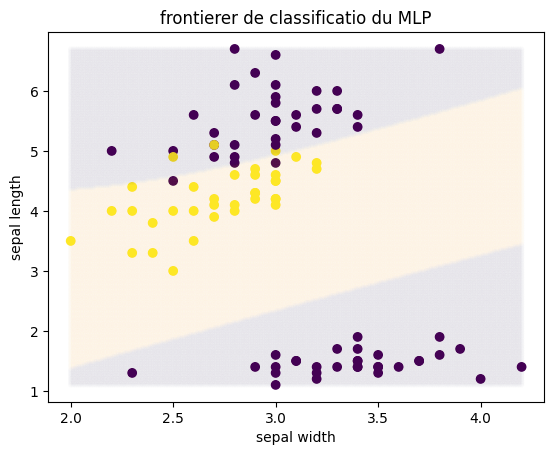

In [14]:
yh = model.predict(X_train) 
x0v = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,0]), 200)
x1v = np.linspace(np.min(X_train[:,1]), np.max(X_train[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
yh_all = model.predict(x_all) > .5
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=yh_all, marker='.', alpha=.01)
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.title('frontierer de classificatio du MLP')
plt.show()

# Exercices 

1. tester différent parametrages ( couches cachés / pas de descente / ...)
1. faites l'affichage des résutlat sur l'ensemble de test aussi
1. essayer de prendre d'autres features d'apprentissages pour voir si les classes sont mieux séparés